# Problem Statement

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

# Importing libraries

In [24]:
# importing Required Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import warnings  # libraries to aviod warnings
warnings.filterwarnings('ignore')

In [25]:
# to print all columns ana all rows

pd.set_option("display.max_columns",None)
df = pd.read_csv("loan.csv") # reading the csv file
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


observation = in the above dataset , there are all type of data are avliable.
              but as we have instructed loan_status as target Variable..and it's Datatype is cateorical, 
              so it is classifiation issue

# EDA

In [26]:
# checking sahpe of dataset 

df.shape

(614, 13)

obs = there are 614 rows and 13 columns

In [27]:
# checking all the columns name

df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [28]:
# checking the types of data

df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

obs = 3  types of data are is present in dataset 

In [29]:
# checking the all information of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


obs = here we get there are 4 columns have float64 , and 1 columns have int value, and 8 columns have object value

In [30]:
# checking the unique value in each and every columns

df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

obseravtion = all columns is having unique values , we noticed one more thing , laon id id have all unique values.. it will dropped.

In [31]:
df = df.drop(["Loan_ID"],axis=1)

In [32]:
# checking for skewness

df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

obseravtion = here we can see the coapplicantincome columns has large number of skewness , i will  replace zero with median 

In [33]:
 #Replacing zeros in CoapplicantIncome by median

df["CoapplicantIncome"].replace(0, df["CoapplicantIncome"].median(),inplace = True)

In [34]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,1188.5,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,1188.5,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,1188.5,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,1188.5,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,1188.5,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,1188.5,187.0,360.0,1.0,Urban,Y


In [35]:
# checking null values

df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

observation = only education, coapplicantincome, property_area, loan_status columns has non null values , nad rest columns has null values

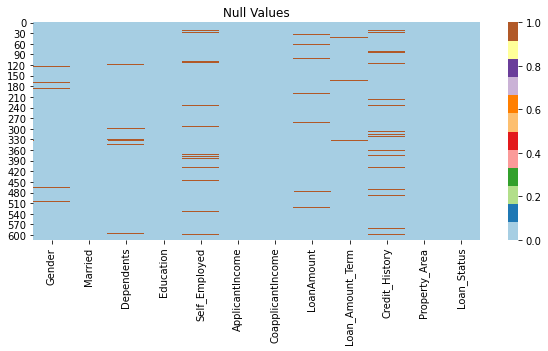

In [36]:
# Visualizeing null values with the help of null values

plt.figure(figsize=[10,4])
sns.heatmap(df.isnull(),cmap="Paired")
plt.title("Null Values")
plt.show()

obs = here we gpot null values wth the help  of heatmap

# Imputation Technique to Replace NaN values:

In [37]:
# Replacing the null values in numerical columns 

df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())

In [38]:
# replacing the null values in categorical columns

df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mode()[0])
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])

obs = i have replaced the all null values

In [39]:
# let's check null values after replaced

df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

now we get there is not any null values

In [40]:
# chekcig unique values of target columns

df["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

 we are getting only two unique , so we can say it is binary classification

In [41]:
# checking description of data set

df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,2149.683094,145.752443,342.410423,0.855049
std,6109.041673,2682.545729,84.107233,64.428629,0.352339
min,150.000000,16.120001,9.000000,12.000000,0.000000
25%,2877.500000,1188.500000,100.250000,360.000000,1.000000
50%,3812.500000,1199.250000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


The mean value and 2nd quantile value has high difference in almost all the columns which means there is a lot of outliers in all the columns.
The count is same which means no null values.
Minimum loan term is 12.
Minimum loan amount is 9.

# Visualization:

# Univariate Analysis:

In [42]:
# checking for categorical columns:

categorical_columns = []
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)        

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [44]:
# checking for numerical values

numerical_columns = []
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)   

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


<Figure size 576x288 with 0 Axes>

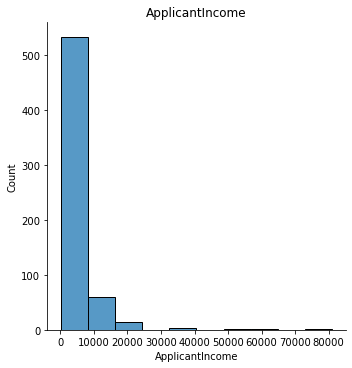

<Figure size 576x288 with 0 Axes>

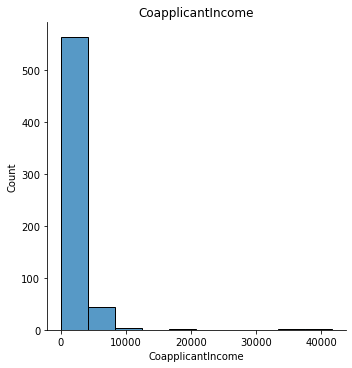

<Figure size 576x288 with 0 Axes>

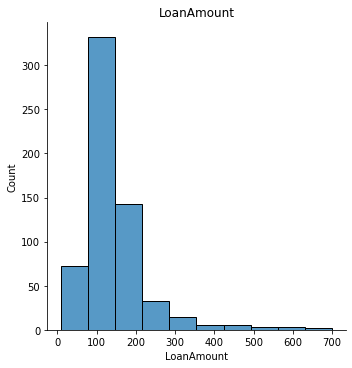

<Figure size 576x288 with 0 Axes>

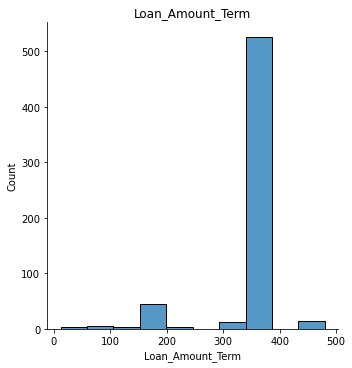

<Figure size 576x288 with 0 Axes>

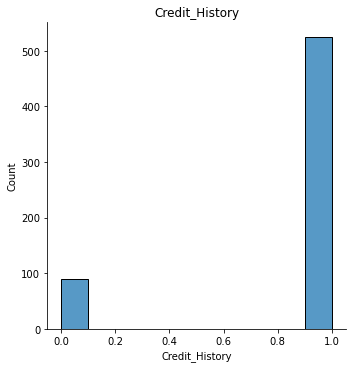

In [46]:
# Distribution plot for all numerical columns :

for i in df[numerical_columns]:
    plt.figure(figsize = (8,4))
    sns.displot(df[i], bins = 10)
    plt.title(i)
    plt.show()

In [47]:
# checking the  values counts of gender columns

df.Gender.value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

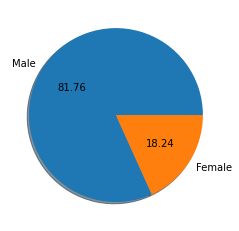

In [49]:
# pie chart of gender

labels = 'Male','Female'
fig, ax = plt.subplots()
ax.pie(df["Gender"].value_counts(), labels=labels,autopct='%1.2f',shadow=True)
plt.show()

In [51]:
# checking the values of married

df.Married.value_counts()

Yes    401
No     213
Name: Married, dtype: int64

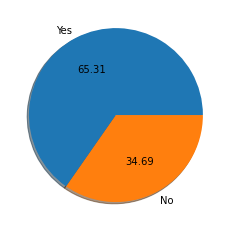

In [52]:
# pie chart of married

labels = 'Yes','No'
fig, ax = plt.subplots()
ax.pie(df["Married"].value_counts(), labels=labels,autopct='%1.2f',shadow=True)
plt.show()

In [54]:
#Checking the value counts of Education column
df.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

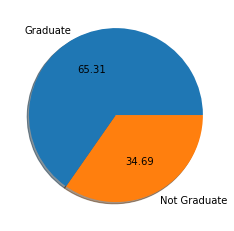

In [56]:
# pie chart of Education

labels = 'Graduate','Not Graduate'
fig, ax = plt.subplots()
ax.pie(df["Married"].value_counts(), labels=labels,autopct='%1.2f',shadow=True)
plt.show()

In [57]:
#Checking the value counts of Self_Employed column
df.Self_Employed.value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

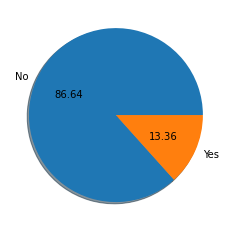

In [58]:
# pie chart of Education

labels = 'No','Yes'
fig, ax = plt.subplots()
ax.pie(df["Self_Employed"].value_counts(), labels=labels,autopct='%1.2f',shadow=True)
plt.show()

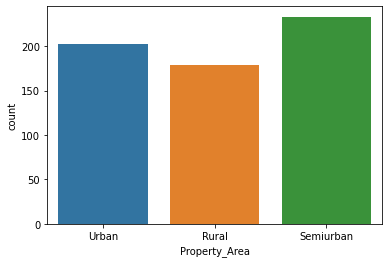

In [59]:
#Count plot for Property_Area
sns.countplot(df['Property_Area']);

semiburn is having great chance to take loan and Rural_property_area have very low.

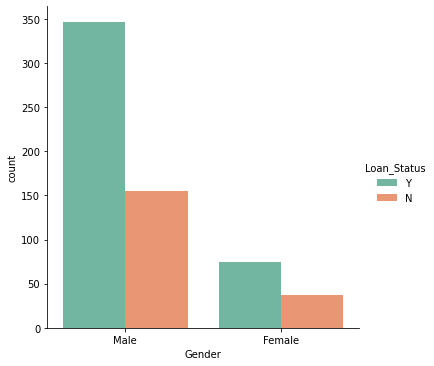

In [60]:
#Factor plot for Gender
sns.factorplot('Gender',kind='count',data=df,hue='Loan_Status',palette="Set2")
plt.xticks(rotation=0);

male has more chance to get loan

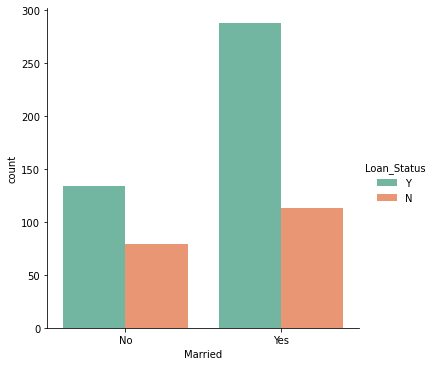

In [64]:
#Factor plot for Married
sns.factorplot('Married',kind='count',data=df,hue='Loan_Status',palette="Set2")
plt.xticks(rotation=0);

Married people have great chance to have loan 

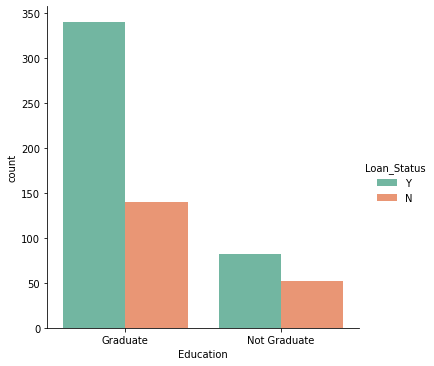

In [65]:
#Factor plot for Education
sns.factorplot('Education',kind='count',data=df,hue='Loan_Status',palette="Set2")
plt.xticks(rotation=0);

Graduate have high chance to get loan

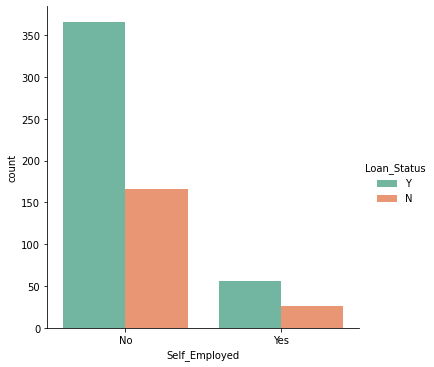

In [67]:
# Factorplot for self_employed

sns.factorplot("Self_Employed",kind="count",data=df,hue="Loan_Status",palette="Set2")
plt.xticks(rotation=0);

most chance is not

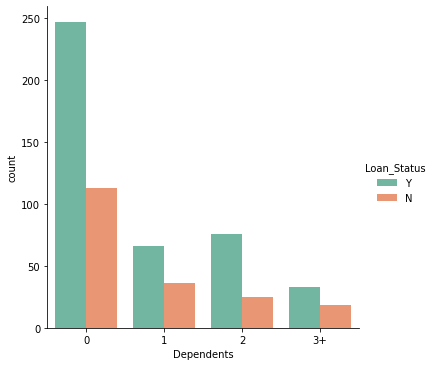

In [70]:
# factorplot for Dependents

sns.factorplot("Dependents",kind="count",data=df,hue="Loan_Status",palette="Set2")
plt.xticks(rotation=0);

The applicants who are not self employed has more chance of getting loan approved.

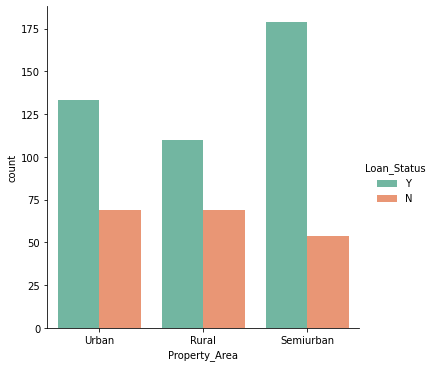

In [71]:
#Factor plot for Property_Area

sns.factorplot('Property_Area',kind='count',data=df,hue='Loan_Status',palette="Set2")
plt.xticks(rotation=0);

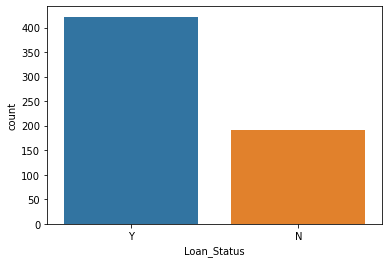

In [72]:
#Count plot for Loan_Status
sns.countplot(df['Loan_Status']);

# Bivariate Analysis

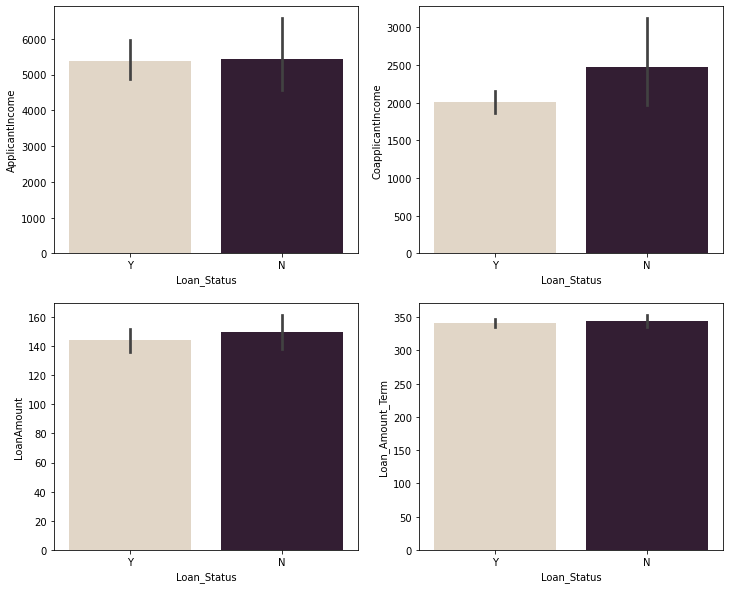

In [73]:
fig,axes=plt.subplots(2,2,figsize=(12,10))

# Checking Loan_Status with ApplicantIncome
sns.barplot(x='Loan_Status',y='ApplicantIncome',ax=axes[0,0],data=df,palette='ch:.25')

# Checking Loan_Status with CoapplicantIncome
sns.barplot(x='Loan_Status',y='CoapplicantIncome',ax=axes[0,1],data=df,palette='ch:.25')

# Checking Loan_Status with LoanAmount
sns.barplot(x='Loan_Status',y='LoanAmount',ax=axes[1,0],data=df,palette='ch:.25')

# Checking Loan_Status with Loan_Amount_Term
sns.barplot(x='Loan_Status',y='Loan_Amount_Term',ax=axes[1,1],data=df,palette='ch:.25')
plt.show()

Based on applicant income the loan status has 50-50 of approval.
If the coapplicant income is about 2000 then the chance is more of getting loan approved.
Loan ammount and loan status also has 50% chance of approval.
For all loan amount term the chance of approval is also same.

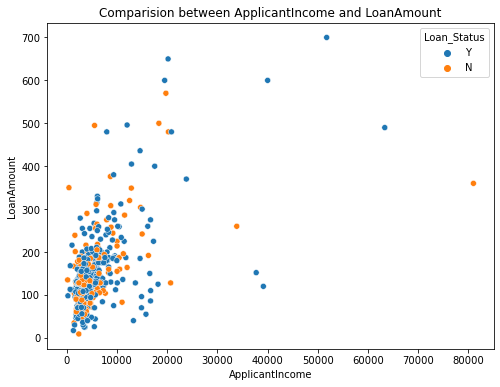

In [74]:
#Comparision between features using scatter plot

plt.figure(figsize=[8,6])
plt.title('Comparision between ApplicantIncome and LoanAmount')
sns.scatterplot(df['ApplicantIncome'],df['LoanAmount'],hue=df['Loan_Status']);


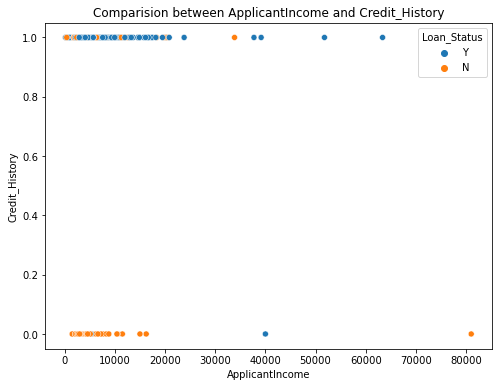

In [75]:
#Comparision between features using scatter plot

plt.figure(figsize=[8,6])
plt.title('Comparision between ApplicantIncome and Credit_History')
sns.scatterplot(df['ApplicantIncome'],df['Credit_History'],hue=df['Loan_Status']);

If the applicant has credit history 1 then thechance of getting loan approved is more irrespective of Applicant Income.

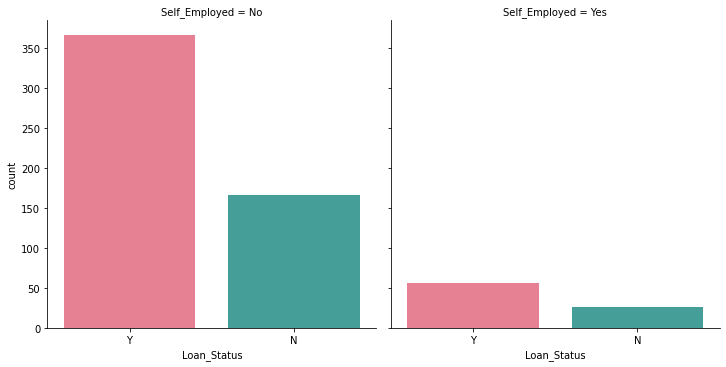

In [76]:
#Comparision between features using cat plot

sns.catplot(x='Loan_Status',col='Self_Employed',data=df,kind='count',palette="husl")

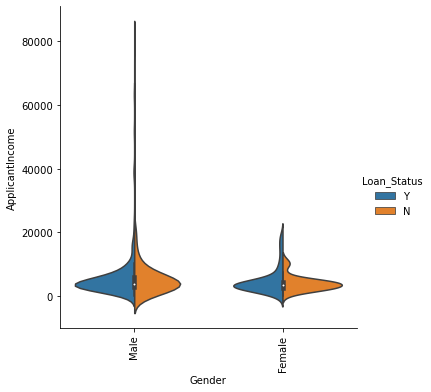

In [77]:
# Let's plot catplot for pair of features
sns.catplot(x = "Gender", y = "ApplicantIncome", hue = "Loan_Status", kind = "violin", data=df, split=True)
plt.xticks(rotation=90);

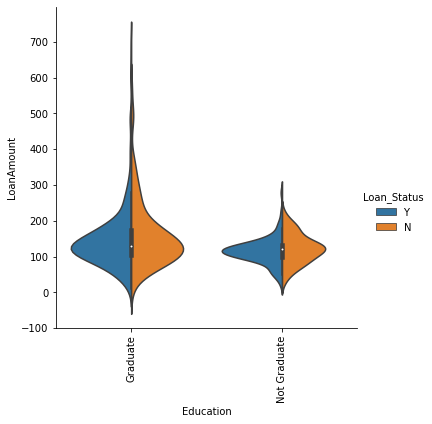

In [78]:
# Let's plot catplot for pair of features

sns.catplot(x = "Education", y = "LoanAmount", hue = "Loan_Status", kind = "violin", data=df, split=True)
plt.xticks(rotation=90);

Graduated people has more chance of getting loan approved.

# MultiVariate Analysis

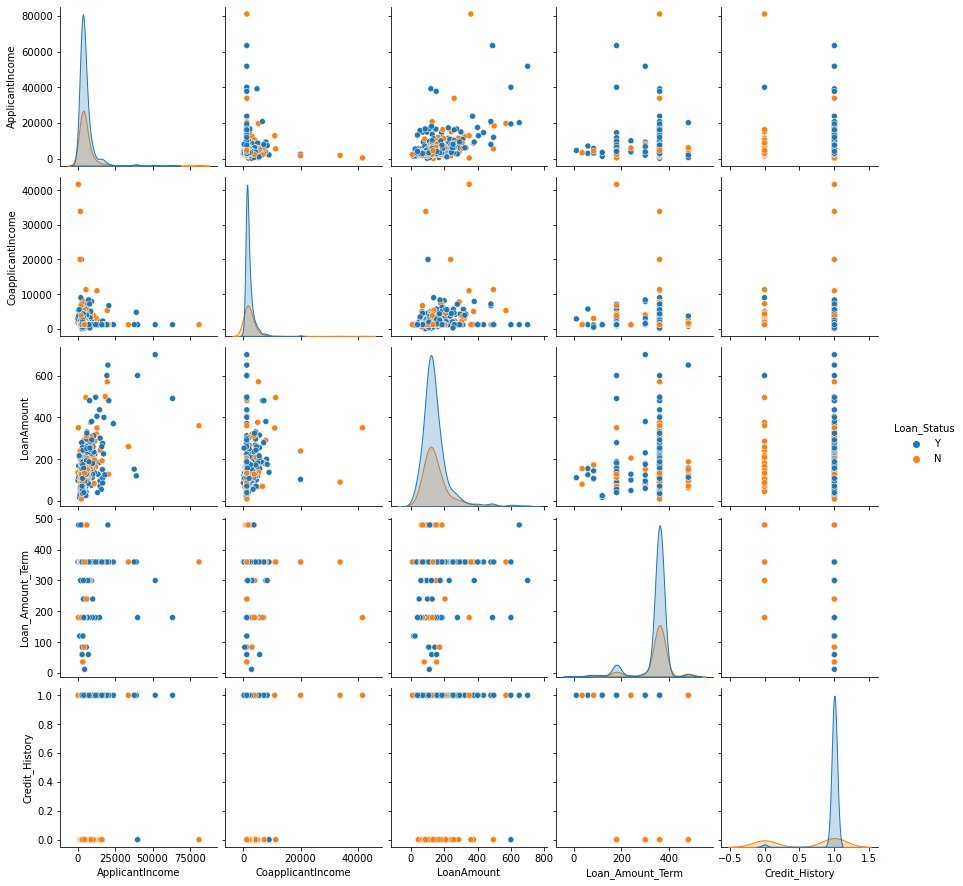

In [79]:
# pair plotting of dataset

sns.pairplot(df,hue="Loan_Status")

# Checking for Outliers:

<AxesSubplot:>

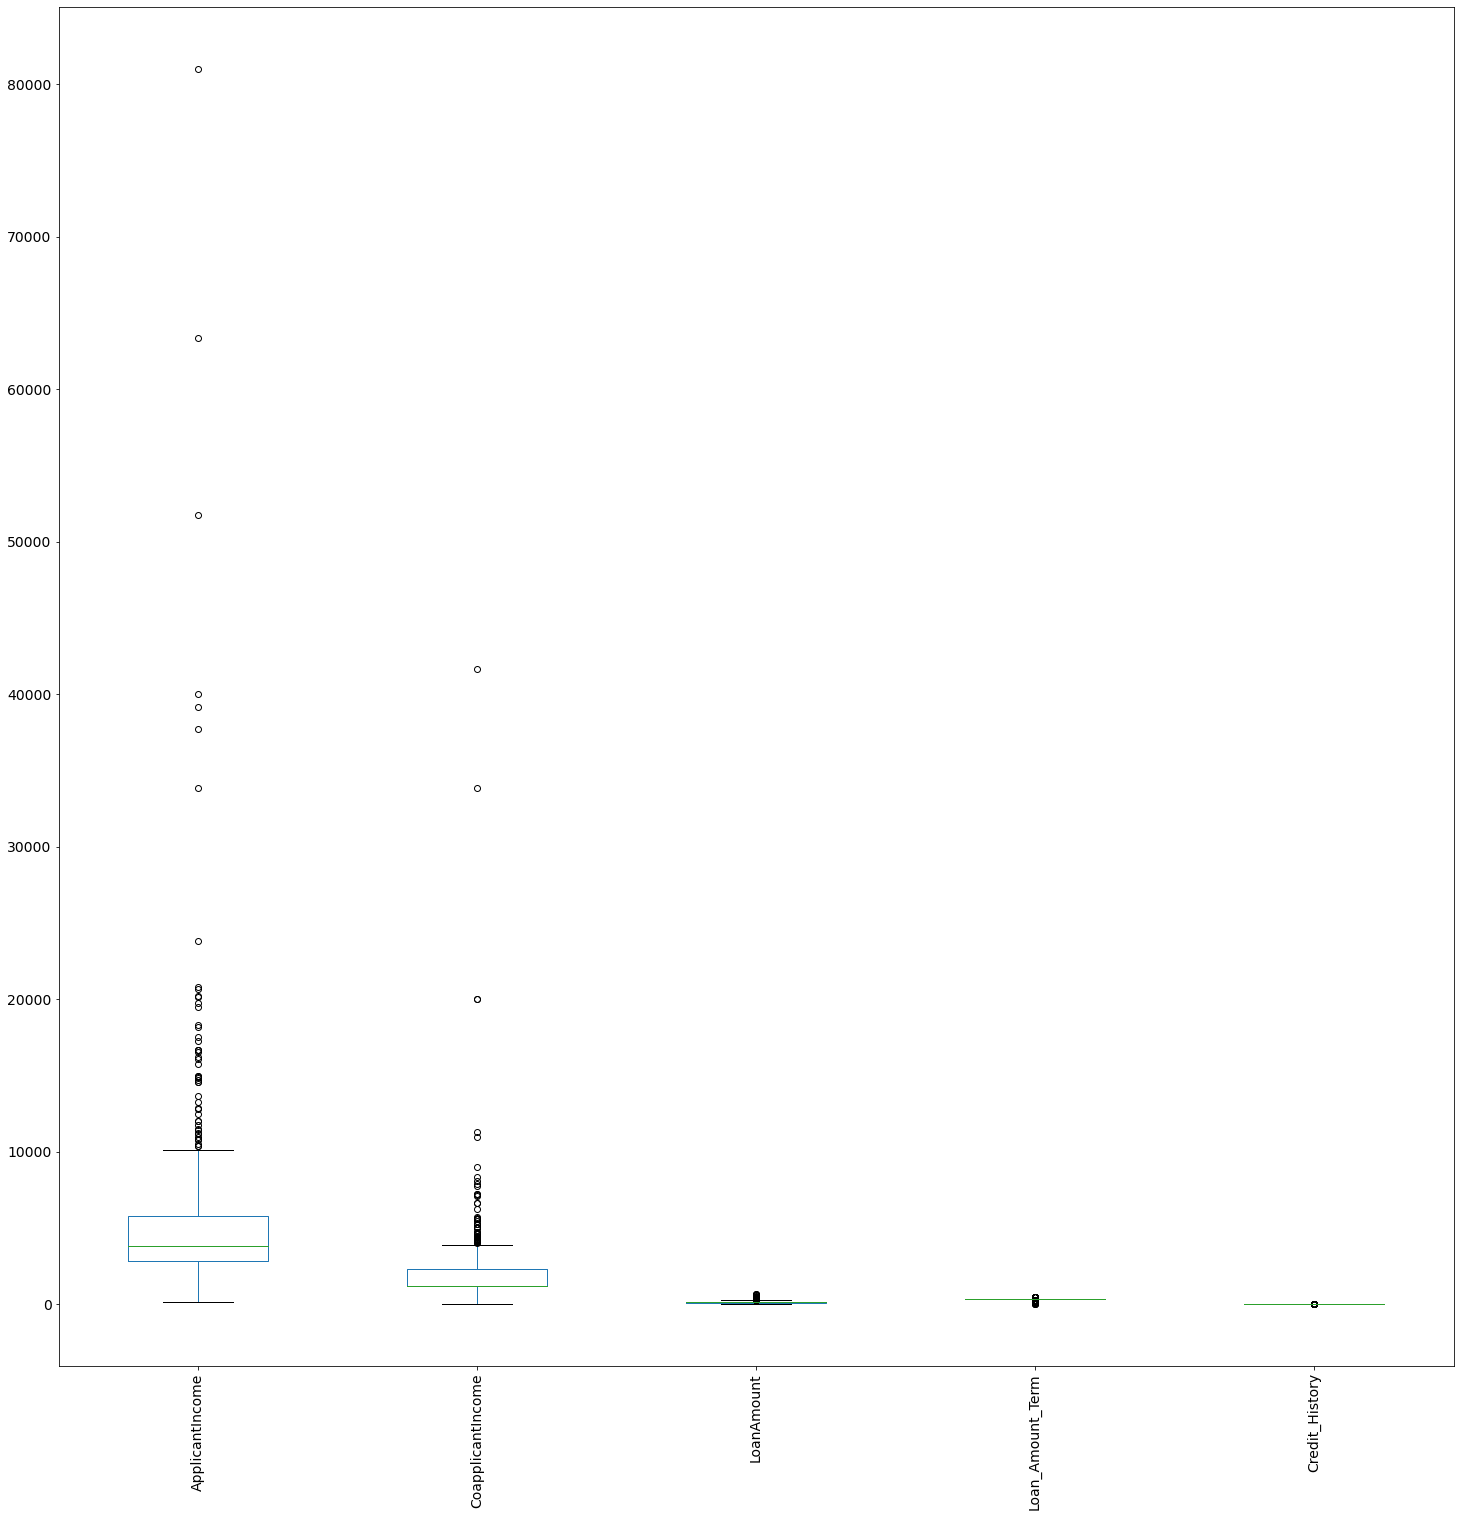

In [80]:
# checking for outliers:

df.plot(rot=90,kind="box",fontsize=14,figsize=(25,25))

here we get the outliers, which  columns is having

# removing outliers (z score)

In [81]:
removers = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]

we are not getting credit history, because it is categroical columns

In [83]:
from scipy.stats import zscore
z=np.abs(zscore(removers))
df_new=df[(z<3).all(axis=1)]
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,1188.5,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,1188.5,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,1188.5,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,1188.5,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,1188.5,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,1188.5,187.0,360.0,1.0,Urban,Y


i have removed all the outliers

In [84]:
# checking the shpe of new dataset

df_new.shape

(577, 12)

In [85]:
# checking the shape of old dataset

df.shape

(614, 12)

In [86]:
# dataloss 

dataloss = (((614-577)/614)*100)
dataloss

6.026058631921824

here we got the loosing percentage is less than 10. which is not  correct

# IQR method

In [89]:
# 1st quantile
Q1=removers.quantile(0.25)

# 3rd quantile
Q3=removers.quantile(0.75)

# IQR
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [90]:
# recheking again shape of new datsset

df_1.shape

(434, 12)

In [91]:
df.shape

(614, 12)

In [92]:
dataloss = (((614-434)/614)*100)
dataloss

29.31596091205212

now it is right , we have got more than 10

# Checking for skewness:

In [93]:
# checking for skewness

df_new.skew()

ApplicantIncome      2.148522
CoapplicantIncome    2.326156
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
dtype: float64

# Removing skewness:

In [94]:
#Creating a list of skewed features
fea=["ApplicantIncome","CoapplicantIncome","LoanAmount"]

In [95]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [96]:
df_new[fea] = scaler.fit_transform(df_new[fea].values)

In [97]:
#Checking skewness again

df_new[fea].skew()

ApplicantIncome      0.027981
CoapplicantIncome    0.079601
LoanAmount           0.048425
dtype: float64

# Label encoding

In [98]:
# Separating categorical columns in df_new
cat_col=[]
for i in df_new.dtypes.index:
    if df_new.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


all the categorical columns are pshowing

In [99]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_new[cat_col]= df_new[cat_col].apply(LE.fit_transform)

In [100]:
df_new[cat_col].head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1


# Checking correlation

In [101]:
cor=df_new.corr()

In [102]:
cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.058590,0.137334,0.172146,-0.104983,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.024783,0.139109,0.181878,-0.127348,0.019308,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.105994,-0.066972,0.131772,-0.087389,-0.020288,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.176074,-0.060180,-0.128715,-0.090523,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.212260,-0.012839,0.117218,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.058590,-0.024783,0.105994,-0.176074,0.212260,1.000000,-0.185490,0.432154,-0.069429,0.028825,-0.011364,-0.002484
CoapplicantIncome,0.137334,0.139109,-0.066972,-0.060180,-0.012839,-0.185490,1.000000,0.304356,-0.068870,-0.032656,-0.082216,0.000762
LoanAmount,0.172146,0.181878,0.131772,-0.128715,0.117218,0.432154,0.304356,1.000000,0.049057,-0.003626,-0.098090,-0.023609
Loan_Amount_Term,-0.104983,-0.127348,-0.087389,-0.090523,-0.032914,-0.069429,-0.068870,0.049057,1.000000,0.027392,-0.057004,-0.020291
Credit_History,0.013172,0.019308,-0.020288,-0.075217,-0.016390,0.028825,-0.032656,-0.003626,0.027392,1.000000,-0.008121,0.560936


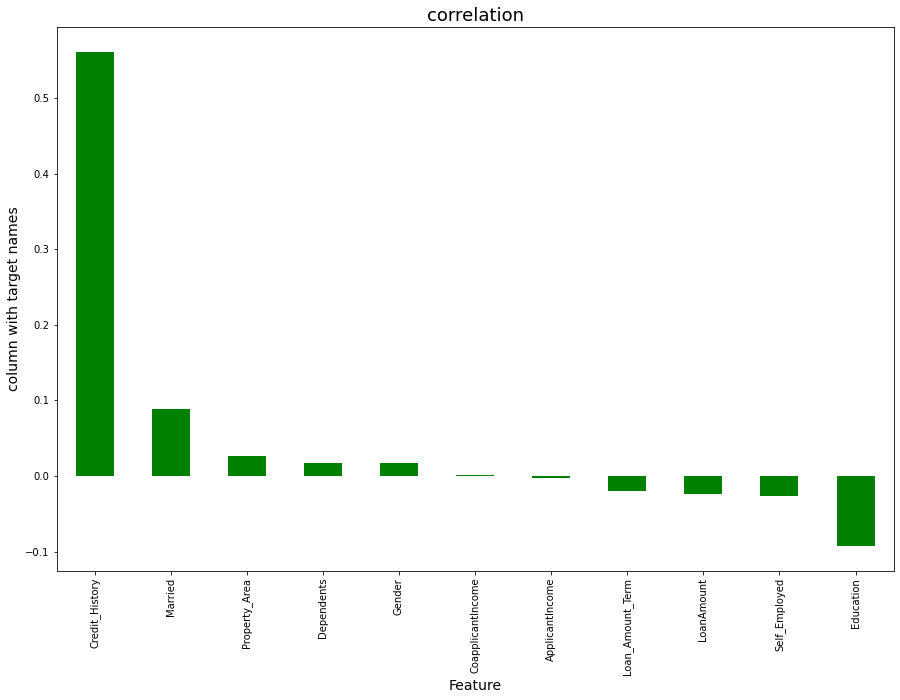

In [103]:
plt.figure(figsize=(15,10))
df_new.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()


two columns have very low amount of data so we will drop that

In [104]:
#Droping less correlated column
df_new = df_new.drop(["CoapplicantIncome"],axis=1)

In [106]:
# seprating columns

x = df_new.drop("Loan_Status",axis=1)
y = df_new["Loan_Status"]

# scalling the data

In [107]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [108]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,0.681780,0.000771,360.0,1.0,2
1,1,1,1,0,0,0.234783,0.000771,360.0,1.0,0
2,1,1,0,0,1,-0.527201,-1.437336,360.0,1.0,2
3,1,1,0,1,0,-0.791972,-0.153545,360.0,1.0,2
4,1,0,0,0,0,0.728848,0.238260,360.0,1.0,2


# finding best random and accuracy

In [109]:
#importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [110]:
from sklearn.ensemble import RandomForestClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestClassifier()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8563218390804598  on Random_state  39


i got 85 % accuracy

In [112]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

In [114]:
#importing necessary libraries.

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

# Decision tree classifier

In [115]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train,y_train)
preddt=DTC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, preddt))
print('Confusion Matrix:',confusion_matrix(y_test, preddt))
print(classification_report(y_test,preddt))

Accuracy Score: 0.7471264367816092
Confusion Matrix: [[32 18]
 [26 98]]
              precision    recall  f1-score   support

           0       0.55      0.64      0.59        50
           1       0.84      0.79      0.82       124

    accuracy                           0.75       174
   macro avg       0.70      0.72      0.70       174
weighted avg       0.76      0.75      0.75       174



# random forest classifier

In [116]:
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
predrf=RFC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predrf))
print('Confusion Matrix:',confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))

Accuracy Score: 0.867816091954023
Confusion Matrix: [[ 31  19]
 [  4 120]]
              precision    recall  f1-score   support

           0       0.89      0.62      0.73        50
           1       0.86      0.97      0.91       124

    accuracy                           0.87       174
   macro avg       0.87      0.79      0.82       174
weighted avg       0.87      0.87      0.86       174



# SVC

In [117]:
SV=SVC()
SV.fit(X_train,y_train)
predsv=SV.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predsv))
print('Confusion Matrix:',confusion_matrix(y_test, predsv))
print(classification_report(y_test,predsv))

Accuracy Score: 0.8793103448275862
Confusion Matrix: [[ 29  21]
 [  0 124]]
              precision    recall  f1-score   support

           0       1.00      0.58      0.73        50
           1       0.86      1.00      0.92       124

    accuracy                           0.88       174
   macro avg       0.93      0.79      0.83       174
weighted avg       0.90      0.88      0.87       174



# K- neighbour classifier

In [118]:
knn=KNN()
knn.fit(X_train,y_train)
predkn=knn.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predkn))
print('Confusion Matrix:',confusion_matrix(y_test, predkn))
print(classification_report(y_test,predkn))

Accuracy Score: 0.8620689655172413
Confusion Matrix: [[ 30  20]
 [  4 120]]
              precision    recall  f1-score   support

           0       0.88      0.60      0.71        50
           1       0.86      0.97      0.91       124

    accuracy                           0.86       174
   macro avg       0.87      0.78      0.81       174
weighted avg       0.86      0.86      0.85       174



# Gradient Booster classifier

In [119]:
GBC=GradientBoostingClassifier()
GBC.fit(X_train,y_train)
predgb=GBC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predgb))
print('Confusion Matrix:',confusion_matrix(y_test, predgb))
print(classification_report(y_test,predgb))

Accuracy Score: 0.867816091954023
Confusion Matrix: [[ 32  18]
 [  5 119]]
              precision    recall  f1-score   support

           0       0.86      0.64      0.74        50
           1       0.87      0.96      0.91       124

    accuracy                           0.87       174
   macro avg       0.87      0.80      0.82       174
weighted avg       0.87      0.87      0.86       174



# cross validation score

In [121]:
#Importing library
from sklearn.model_selection import cross_val_score

# cv score for Decision Tree Classifier
print(cross_val_score(DTC,X,y,cv=5).mean())

0.7227736131934034


In [124]:
# cv score for KNN Classifier
print(cross_val_score(knn,X,y,cv=5).mean())

0.779880059970015


In [125]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,X,y,cv=5).mean())

0.786896551724138


In [126]:
# cv score for Support Vector Classifier
print(cross_val_score(SV,X,y,cv=5).mean())

0.8146326836581709


In [127]:
# cv score for Gradient Boosting Classifier
print(cross_val_score(GBC,X,y,cv=5).mean())

0.7956071964017991


# i got best score 82 % in svc 

In [134]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [135]:
parameter = {'criterion':['gini','entropy'],
             'max_depth': [10,15,20,25],
             'n_estimators':[100,200,300,400],
             'max_features': ["auto","sqrt","log2"]}

In [136]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [137]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400]})

In [138]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 300}

In [139]:
Final_mod=RandomForestClassifier(criterion='entropy',max_depth=20, max_features='auto', n_estimators=200)
Final_mod.fit(X_train,y_train)
pred=Final_mod.predict(X_test)
acc=accuracy_score(y_test, pred)

print(acc*100)

86.20689655172413


In [140]:
print('Accuracy Score:',accuracy_score(y_test,pred))
print('Confusion matrix:',confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy Score: 0.8620689655172413
Confusion matrix: [[ 30  20]
 [  4 120]]
              precision    recall  f1-score   support

           0       0.88      0.60      0.71        50
           1       0.86      0.97      0.91       124

    accuracy                           0.86       174
   macro avg       0.87      0.78      0.81       174
weighted avg       0.86      0.86      0.85       174



# i got 86.3 % score, that is good

# saving model

In [141]:
#Saving the model as .pkl file
import joblib
joblib.dump(Final_mod,"LoanPrediction.pkl")

['LoanPrediction.pkl']

# thank you